In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from patsy import dmatrices
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./csv파일/데이터셋_4(심각도).csv',encoding='cp949')

In [3]:
df

,사고유형,연령가해자,법규위반가해자,행동유형가해자,피해자신체상해주부위,차량용도가해자,도로종류,도로형태,도로선형,발생시각,심각도
0,횡단중,65세이상,그룹1,그룹2,그룹5,그룹4,시도,단일로,평지,출퇴근시간,1
1,횡단중,51-60세,그룹1,그룹3,그룹4,그룹1,시도,교차로,평지,저녁~자정,1
2,길가장자리구역통행중,31-40세,그룹1,그룹3,그룹3,그룹4,시도,단일로,평지,낮,1
3,횡단중,41-50세,그룹1,그룹2,그룹4,그룹1,시도,단일로,평지,출퇴근시간,1
4,횡단중,51-60세,그룹2,그룹3,그룹4,그룹1,시도,교차로,평지,낮,1
...,...,...,...,...,...,...,...,...,...,...,...
27279,횡단중,31-40세,그룹1,그룹2,그룹5,그룹4,시도,교차로,평지,낮,1
27280,횡단중,41-50세,그룹1,그룹3,그룹5,그룹2,군도,교차로,평지,출퇴근시간,1
27281,횡단중,41-50세,그룹2,그룹3,그룹5,그룹1,시도,교차로,평지,출퇴근시간,1
27282,길가장자리구역통행중,51-60세,그룹1,그룹2,그룹2,그룹4,시도,단일로,평지,낮,0


In [4]:
x=df.drop(['심각도'],axis=1)
x = pd.get_dummies(x,drop_first=True)
y=pd.DataFrame(df['심각도'])

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,shuffle=True) 

In [5]:
x_train

,사고유형_보도통행중,사고유형_차도통행중,사고유형_횡단중,연령가해자_21-30세,연령가해자_31-40세,연령가해자_41-50세,연령가해자_51-60세,연령가해자_61-64세,연령가해자_65세이상,법규위반가해자_그룹2,...,도로종류_일반국도,도로종류_지방도,도로종류_특별광역시도,도로형태_단일로,도로형태_주차장,도로선형_오르막,도로선형_평지,발생시각_새벽~아침,발생시각_저녁~자정,발생시각_출퇴근시간
21268,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,1
17557,0,0,1,0,0,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,1
6339,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
20901,0,0,1,0,1,0,0,0,0,1,...,0,0,1,1,0,0,1,0,0,1
25357,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25551,0,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
16616,0,1,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,1
19377,0,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,1,0,0,0
25709,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1


# ■ 로지스틱 모델을 활용한 예측모델 생성

In [6]:
log = LogisticRegression()
log.fit(x_train,y_train)

y_pred = log.predict(x_test)

### ▶ 정밀도(precision): 64% , 재현율(recall): 53%, 정확도(accuracy): 73%

In [7]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.09      0.16      2216
           1       0.74      0.97      0.84      5970

    accuracy                           0.73      8186
   macro avg       0.64      0.53      0.50      8186
weighted avg       0.69      0.73      0.66      8186



In [17]:
pd.DataFrame(y_pred) # 값을 전부 다 뽑아서 보면 0또는 1로 예측된 값 확인 가능

,0
0,1
1,1
2,1
3,1
4,1
...,...
8181,1
8182,1
8183,1
8184,1


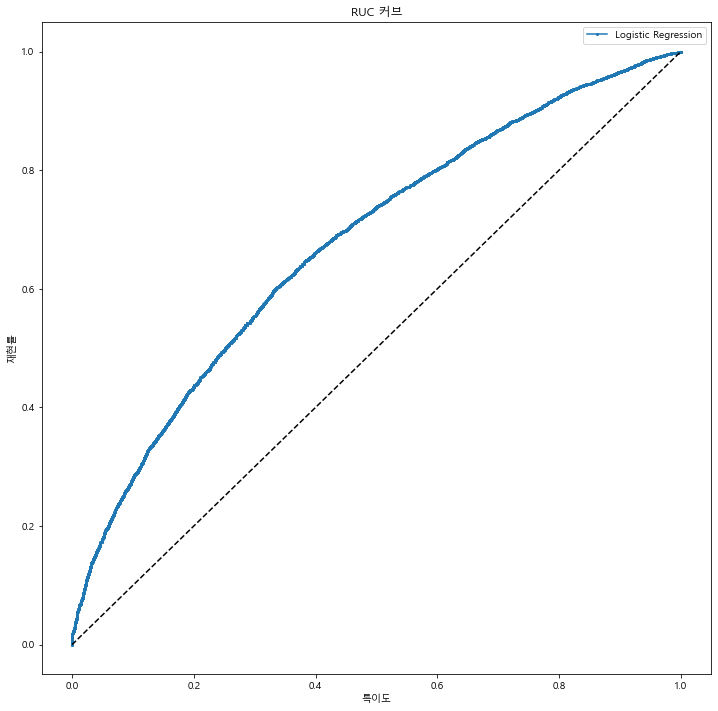

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
rcParams['figure.figsize'] = 12,12


from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


fpr, tpr, threshold = roc_curve(y_train, log.decision_function(x_train))

plt.plot(fpr,tpr, 'o-', ms=2, label="Logistic Regression")
plt.legend()
plt.plot([0,1],[0,1], 'k--',label='radom guess')
plt.xlabel('특이도')
plt.ylabel('재현률')
plt.title('RUC 커브')
plt.show()

#### AUC 값은 0.5~1의 범위를 가지는데 0.5면 성능이 전혀 없음. 1이면 최고의 성능이라고 할 수 있다.

In [19]:
print('AUC: {}'.format(auc(fpr,tpr)))  # 0.5에 가까울 수록 성능이 좋지 못함

AUC: 0.6770543201097604


# ■ 로지스틱 회귀 모델 생성 및 평가
### ▶ Pseudo R-squ(R제곱): 0.06573 (6.57%)
### ▷ R값이 작게나왔지만, 로지스틱 회귀분석은 보통 R제곱값이 낮게 나온다.  따라서R제곱에 의존할 필요는 없다.


In [20]:
import statsmodels.api as sm

logit = sm.Logit(y,x)
result = logit.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.544457
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    심각도   No. Observations:                27284
Model:                          Logit   Df Residuals:                    27249
Method:                           MLE   Df Model:                           34
Date:                Thu, 26 Nov 2020   Pseudo R-squ.:                 0.06573
Time:                        13:13:41   Log-Likelihood:                -14855.
converged:                       True   LL-Null:                       -15900.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
사고유형_보도통행중         0.3147      0.085      3.713      0.000       0.149       0.481
사고유형_차도통행중       

# ■ 오즈비 확인
### ▶ 독립변수들의 오즈비를 구해보자
### ▶ 오즈비는 1을 기준으로 1보다 크면 심각한사고일 확률이 커지고 1보다 작으면 심각하지 않은 사고 일 확률이 커진다는 것을 나타낸다. 
### ▶ 오즈비가 1 이면 결과에 별다른 영향을 미치지 않는 다고 볼 수 있다.
### ▶ 회귀계수가 변수의 오즈비의 로그값이므로 exp을 취해서 보자

In [22]:
print(np.exp(result.params))

사고유형_보도통행중         1.369873
사고유형_차도통행중         1.254598
사고유형_횡단중           1.592925
연령가해자_21-30세       1.011254
연령가해자_31-40세       1.029417
연령가해자_41-50세       1.044927
연령가해자_51-60세       0.999581
연령가해자_61-64세       1.062622
연령가해자_65세이상        1.002803
법규위반가해자_그룹2        1.076741
법규위반가해자_그룹3       27.674067
행동유형가해자_그룹2        1.497150
행동유형가해자_그룹3        1.224705
행동유형가해자_그룹4        0.747685
피해자신체상해주부위_그룹2     1.425749
피해자신체상해주부위_그룹3     2.382535
피해자신체상해주부위_그룹4     3.666870
피해자신체상해주부위_그룹5     5.190190
피해자신체상해주부위_그룹6     9.441846
차량용도가해자_그룹2        0.910271
차량용도가해자_그룹3        0.682268
차량용도가해자_그룹4        0.811904
차량용도가해자_그룹5        0.387034
도로종류_군도            0.580355
도로종류_시도            0.485594
도로종류_일반국도          0.728829
도로종류_지방도           0.572900
도로종류_특별광역시도        0.432562
도로형태_단일로           0.978842
도로형태_주차장           0.788272
도로선형_오르막           0.871497
도로선형_평지            0.784435
발생시각_새벽~아침         1.850335
발생시각_저녁~자정         1.230336
발생시각_출퇴근시간         1.215961
dtype: float64


#### 오즈비 1 이 넘지 않는  것 삭제 후 다시

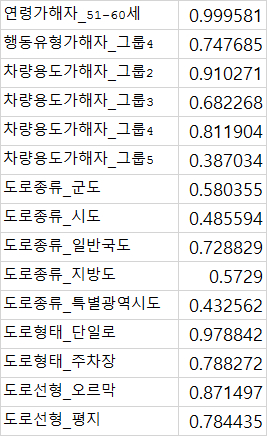

In [23]:
x2 = x.drop(['도로종류_특별광역시도','도로종류_시도','차량용도가해자_그룹5','도로종류_지방도'
            ,'도로종류_군도','행동유형가해자_그룹4','도로종류_일반국도','차량용도가해자_그룹3'
            ,'도로형태_주차장','차량용도가해자_그룹2','차량용도가해자_그룹4'
             ,'연령가해자_51-60세'
            ,'도로형태_단일로'],axis=1)

## 다시 로지스틱 회귀

In [24]:
logit = sm.Logit(y,x2)
result = logit.fit()
print(result.summary()) 

Optimization terminated successfully.
         Current function value: 0.548460
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    심각도   No. Observations:                27284
Model:                          Logit   Df Residuals:                    27262
Method:                           MLE   Df Model:                           21
Date:                Thu, 26 Nov 2020   Pseudo R-squ.:                 0.05886
Time:                        13:20:46   Log-Likelihood:                -14964.
converged:                       True   LL-Null:                       -15900.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
사고유형_보도통행중         0.2295      0.084      2.745      0.006       0.066       0.393
사고유형_차도통행중       

### 1. <사고유형>은 '길가장자리구역통행중'이 참조(기준)변수로
####  사고유형이 '횡단중'(0.4434)일 때 '길가장자리구역통행중'보다 사고 심각도가 증가하는 것으로 보인다.  
### 2. <연령가해자>는 '20세이하'가 참조(기준)변수인데
#### 나머지 범주들의 P_value가 모두 0.05 이상으로 유의한 범주가 없다. 
### 3. <법규위반가해자>는 '그룹1'이 참조(기준)변수로  [그룹1: 교차로 통행방법 위반, 안전거리 미확보, 안전운전 의무 불이행]
#### 법규위반가해자가 '그룹3'(3.4433)일 때 '그룹1'보다 사고 심각도가 더 증가하는 것으로 보인다.
#### [그룹3: 과속]
### 4. <행동유형가해자>는 '그룹1'이 참조(기준)변수로  [그룹1: 후진중, 출발중]
#### 행동유형가해자가 '그룹2'(0.3371)일 때 '그룹1'보다 사고 심각도가 증가하는 것으로 보인다.
#### [그룹2: 진로변경중, 직진중]
### 5. <피해자신체상해주부위>는 '그룹1'이 참조(기준)변수로  [그룹1: 상해없음]
#### 피해자신체상해주부위가 '그룹6'(1.4229)일 때 '그룹1'보다 사고 심각도가 증가하는 것으로 보인다.
#### [그룹6: 가슴]
### 6. <도로선형>은 '내리막'이 참조(기준)변수로 
#### 도로선형이 '평지'(-0.2459)일 때 '내리막'보다 사고 심각도가 감소하는 것으로 보인다.
### 7. <발생시각>은 '낮'이 참조(기준)변수로
#### 발생시각이 '새벽~아침'(0.6238)일 때 사고 심각도가 증가하는 것으로 보인다.

## 오즈비 출력

In [26]:
print(np.exp(result.params))

사고유형_보도통행중         1.258009
사고유형_차도통행중         1.226691
사고유형_횡단중           1.558044
연령가해자_21-30세       0.938414
연령가해자_31-40세       1.005155
연령가해자_41-50세       1.045271
연령가해자_61-64세       1.092225
연령가해자_65세이상        1.021998
법규위반가해자_그룹2        1.060503
법규위반가해자_그룹3       31.289390
행동유형가해자_그룹2        1.400923
행동유형가해자_그룹3        1.203808
피해자신체상해주부위_그룹2     0.616126
피해자신체상해주부위_그룹3     1.026676
피해자신체상해주부위_그룹4     1.566320
피해자신체상해주부위_그룹5     2.287018
피해자신체상해주부위_그룹6     4.149148
도로선형_오르막           0.868038
도로선형_평지            0.781967
발생시각_새벽~아침         1.866072
발생시각_저녁~자정         1.215576
발생시각_출퇴근시간         1.216345
dtype: float64


## 오즈비 결과에 따르면 다음 순서로 심각한 사고를 일으킬 확률이 높다. (중복 컬럼은 상위 단계만)
### 1. 법규위반가해자_그룹3 (31.289390) 
#### 그룹3: 과속
### 2. 피해자신체상해주부위_그룹6  (4.149148)
#### 그룹6: 가슴 
### 3. 발생시각_새벽~아침 (1.866072)
#### 새벽~아침: 02-04시, 05-07시
### 4. 사고유형_횡단중 (1.558044)

---

---

---

# ※그룹핑 기준 참고 (anova 결과에 따라 묶음)

## 3. 법규위반가해자
#### 교차로 통행방법 위반, 안전거리 미확보, 안전운전 의무 불이행 - 그룹1
#### 신호위반, 보행자 보호의무 위반, 중앙선 침범 - 그룹2
#### 과속 - 그룹3
## 4. 행동유형가해자
#### 후진중, 출발중 -그룹1
#### 진로변경중, 직진중 - 그룹2
#### 좌우회전중, 앞지르기중, U턴중 - 그룹3
#### 주행 중 대기, 주정차중 - 그룹4
## 5. 피해자신체상해주부위
#### 상해없음 - 그룹1
#### 팔, 앞목, 목, 뒷목 - 그룹2
#### 허리, 어깨, 손, 등 - 그룹3
#### 하퇴부, 얼굴, 발 - 그룹4
#### 배, 머리, 대퇴부 - 그룹5
#### 가슴 - 그룹6
## 6. 차량용도가해자
#### 화물차, 택시, 전세버스, 기타/건설기계- 그룹1
#### 특수여객(장의), 콘크리트믹서, 위험물운송, 덤프트럭, 농기계, 노선버스 - 그룹2
#### 이륜차, 원동기장치자전거, 어린이통학버스, 사륜오토바이(ATV) 그룹3
#### 승용차, 사업용기타, 비사업용기타, 버스, 렌터카 - 그룹4
#### 개인형이동수단(PM), 자전거 - 그룹5

## 10. 발생시각
#### 02-04시, 05-07시 - 그룹1 (새벽~아침)
#### 08-10시, 17-19시 - 그룹2 ( 출퇴근 시간)
#### 11-13시, 14-16시 - 그룹3 (낮)
#### 20-22시, 23-01시 - 그룹4 (저녁~자정